In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [3]:
#hide the warnings
import warnings
warnings.filterwarnings('ignore')

**LOADING THE DATA SET**

In [4]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import zipfile
import pandas as pd

# Path to your ZIP file in Google Drive after mounting
zip_file_path = '/content/drive/My Drive/Zomato.zip'

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/My Drive/Zomato')  # Extract to a folder

# Path to the extracted CSV file
extracted_csv_path = '/content/drive/My Drive/Zomato/zomato.csv'

# Read the CSV file using pandas
data = pd.read_csv(extracted_csv_path)

# Display the first few rows of the dataset
print(data.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                                                 url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                    

**Checking the size of dataset**

In [5]:
data.shape

(51717, 17)

**Checking the columns in the dataset**

In [6]:
data.columns.to_list()

['url',
 'address',
 'name',
 'online_order',
 'book_table',
 'rate',
 'votes',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)',
 'reviews_list',
 'menu_item',
 'listed_in(type)',
 'listed_in(city)']

**Renaming columns**

In [7]:
#Renaming the coloumns approx_cost(for two people), listed(city) with approx_cost,area respectively
data.rename(columns={'approx_cost(for two people )': 'approx_cost','listed_in(city)':'area'},inplace=True)

**Data Cleaning**<br>
Now, we clean our data by dropping the irrelevant columns,handling the wrong datatypes,handling the null values and the outliers.<br>
**Dropping irrevalant columns**


In [8]:
#url,address,menu_item,reviews_list,dish_liked,phone,listed_in(type) are irrelevant for the problems solution
data.drop(['url','address','menu_item','reviews_list','dish_liked','phone','listed_in(type)'],axis=1 ,inplace=True)
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),area
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Banashankari


**Checking and Handling the Datatypes**

In [9]:
#checking the types of data present in the Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   area                         51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


From above result, we can see that the coloumns {rate,location,rest_type,approx_cost,cuisiness} either have null values ,wrong datatypes or both.

**Rate Column**



In [10]:
#checking the unique values in the rate column of the dataset
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

Above result shows that there are many null values and garbage values also.


In [11]:
#replacing all the null values and garbage value and making it to be coverted into numbers
data['rate']=data['rate'].str.replace("/5","")
data['rate']=data['rate'].str.replace("nan","NaN")
data['rate']=data['rate'].str.replace("NEW","NaN")
data['rate']=data['rate'].str.replace("-","NaN")
data['rate']=data['rate'].str.replace(" /5","")
data['rate']=data['rate'].fillna(np.nan)
data['rate']=data['rate'].str.replace(" ","")


In [12]:
#Verifying the results
data['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NaN', '2.9', '3.5', nan,
       '2.6', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '4.9', '2.1', '2.0', '1.8'], dtype=object)

In [13]:
#changing the datatype of rate column from object to float
data['rate']=data['rate'].astype(float)

**Approx CostColumn**


In [14]:
#checking the unique values in the approx cost coulmn of the dataset
data['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

Above we can see that there are null values and numeric values but in the object type.

In [15]:
#Replacing the null values and make it able to convert
data['approx_cost(for two people)']=data['approx_cost(for two people)'].str.replace("nan","NaN")
data['approx_cost(for two people)']=data['approx_cost(for two people)'].fillna('NaN')
data['approx_cost(for two people)']=data['approx_cost(for two people)'].str.replace(",","")

In [16]:
#verifying the results
data['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', 'NaN', '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

In [17]:
#changing the datatype of the column from object to Float
data['approx_cost(for two people)']=data['approx_cost(for two people)'].astype(float)

In [18]:
#Again checking the datatyes of columns to verify
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51717 non-null  object 
 1   online_order                 51717 non-null  object 
 2   book_table                   51717 non-null  object 
 3   rate                         41665 non-null  float64
 4   votes                        51717 non-null  int64  
 5   location                     51696 non-null  object 
 6   rest_type                    51490 non-null  object 
 7   cuisines                     51672 non-null  object 
 8   approx_cost(for two people)  51371 non-null  float64
 9   area                         51717 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 3.9+ MB


**Checking for Null Values**

In [19]:
#checking the number of null values columnwise
data.isna().sum()

name                               0
online_order                       0
book_table                         0
rate                           10052
votes                              0
location                          21
rest_type                        227
cuisines                          45
approx_cost(for two people)      346
area                               0
dtype: int64

In [20]:
#checking the percentage of null values in each column
(data.isna().sum()/data.shape[0])*100

name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           19.436549
votes                           0.000000
location                        0.040606
rest_type                       0.438927
cuisines                        0.087012
approx_cost(for two people)     0.669026
area                            0.000000
dtype: float64

Here we can see that coulumns location ,resttype,cuisines,approx_cost have less number of null values as compared to rate columns. So, we can drop that null values.

In [21]:
#Here we dropping the null values from the columns having lesser number of null values
data=data[data['location'].notna()]
data=data[data['rest_type'].notna()]
data=data[data['cuisines'].notna()]
data=data[data['approx_cost(for two people)'].notna()]


In [22]:
#verifying the results
data.isna().sum()

name                              0
online_order                      0
book_table                        0
rate                           9885
votes                             0
location                          0
rest_type                         0
cuisines                          0
approx_cost(for two people)       0
area                              0
dtype: int64

**Handling null values in rate column**  <br>
As the rate column has greater number of null values ,dropping them leads to losing the large amount of data.So,instead of dropping it, we will impute with either mean ,median or mode.

In [23]:
#checking all the statistics of rate column
data['rate'].describe()

count    41263.000000
mean         3.702011
std          0.439985
min          1.800000
25%          3.400000
50%          3.700000
75%          4.000000
max          4.900000
Name: rate, dtype: float64

In [24]:
#for imputing the values, we will check for outliers
q1=data['rate'].quantile(0.25)
q3=data['rate'].quantile(0.75)
iqr=q3-q1
lower_range=q1-(1.5*iqr)
upper_range=q3+(1.5*iqr)
outliers=len(data[(data['rate']<lower_range) | (data['rate']> upper_range)])
print('no of rows having outliers: ',outliers)


no of rows having outliers:  183


Here we can see that 183 rows have outliers but as we know that rating are always in the range from 1.0 to 5.0. So,using the mean is not appropiate.<br>
Therefore,we will impute with median.

In [25]:
#imputing the null values with median of ratecolumn
data['rate']=data['rate'].fillna(data['rate'].median())


In [26]:
#verifying the results
data.isna().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
area                           0
dtype: int64

In [27]:
#After dropping the values we will reset the index
data.reset_index(inplace=True)
data.drop(['index'],axis=1,inplace=True)


**Data Visualization**

Now, we visualize our data based on different parameters to understand the realtions and some insigts from our dataset.

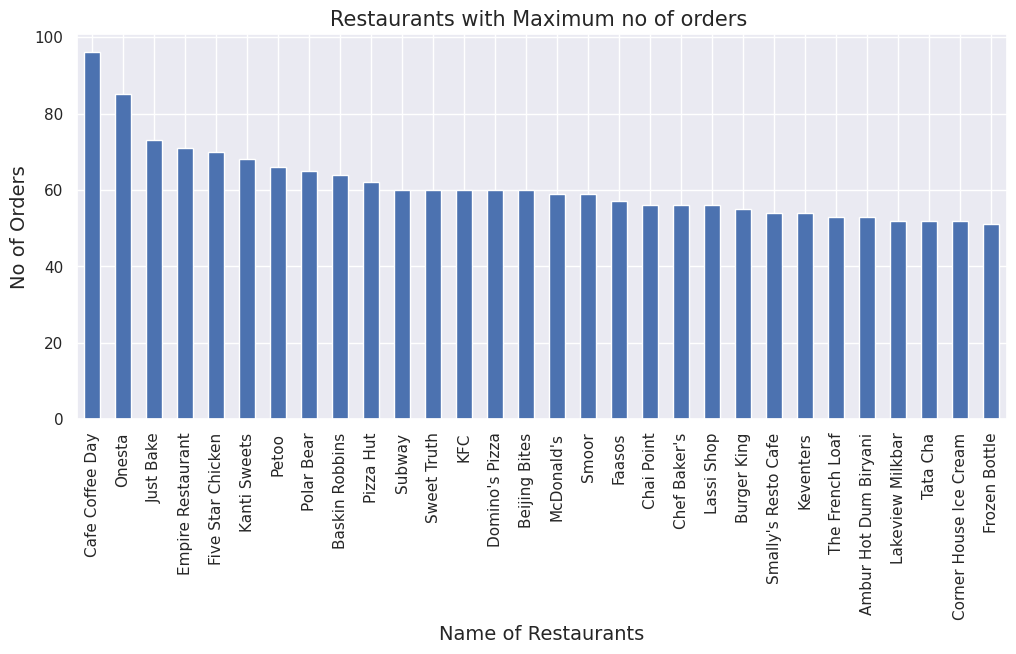

In [28]:
#Checking for the restauarants git higher number of orders
plt.figure(figsize=(12,5))
df=data['name'].value_counts()[:30]
df.plot(kind='bar')
plt.xlabel('Name of Restaurants',size=14)
plt.ylabel('No of Orders',size=14)
plt.title('Restaurants with Maximum no of orders ',fontsize=15)
plt.show()


In [33]:
data.columns.to_list()

['name',
 'online_order',
 'book_table',
 'rate',
 'votes',
 'location',
 'rest_type',
 'cuisines',
 'approx_cost(for two people)',
 'area']

Above Bar chart shows that the cafe coffe Day and onesta got slightly higher number of orders as compared to othrs restaurants while others got approximately same number of orders.

**Number of Restaurants having Online order Facility**

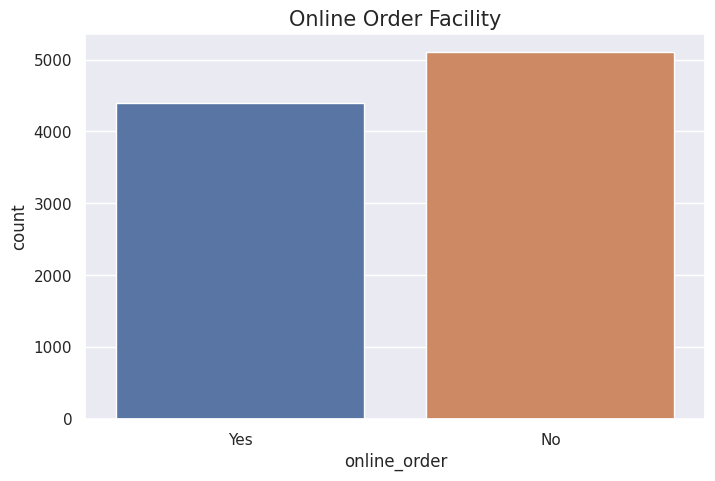

In [37]:
# Selecting 'name' and 'online_order' columns and dropping duplicate rows
dff= data[['name', 'online_order']].drop_duplicates()

# Creating a countplot to visualize the count of online_order values
plt.figure(figsize=(8, 5))
ax = sns.countplot(x="online_order", data=dff).set_title('Online Order Facility', fontsize=15)
plt.show()

From above chart, we can see that only 4397 restaurants in Bangalore have **Online Order Facility** which less than the half of the restaurants.


**Number of restaurants having prebooking Table Facility**

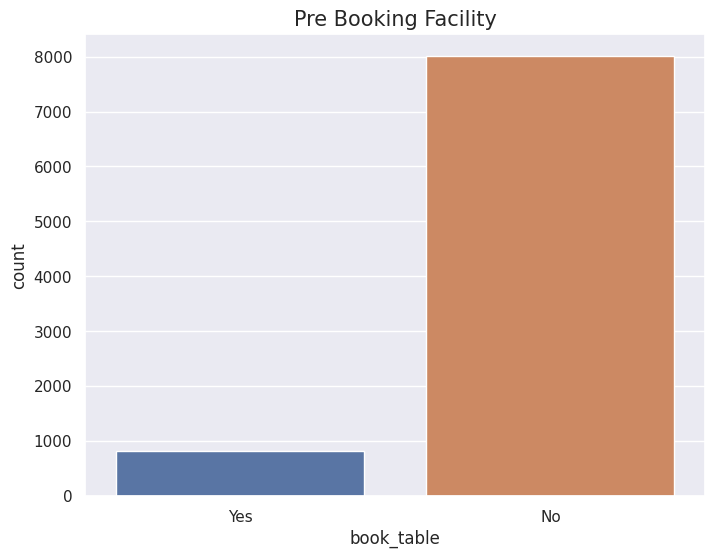

In [38]:
#checking the number of restaurants having prebooking table facility
df_1=data[['name', 'book_table']].drop_duplicates()
plt.figure(figsize=(8,6))
ax = sns.countplot(x="book_table", data=df_1).set_title('Pre Booking Facility', fontsize=15)
plt.show()


From above chart we can see that most of the restaurants in Bangalore doesnt have **Pre Booking Facility** which is about 8011 restaurants and only 820 restaurants having these facility.

**Top Locations got Higher no of orders**

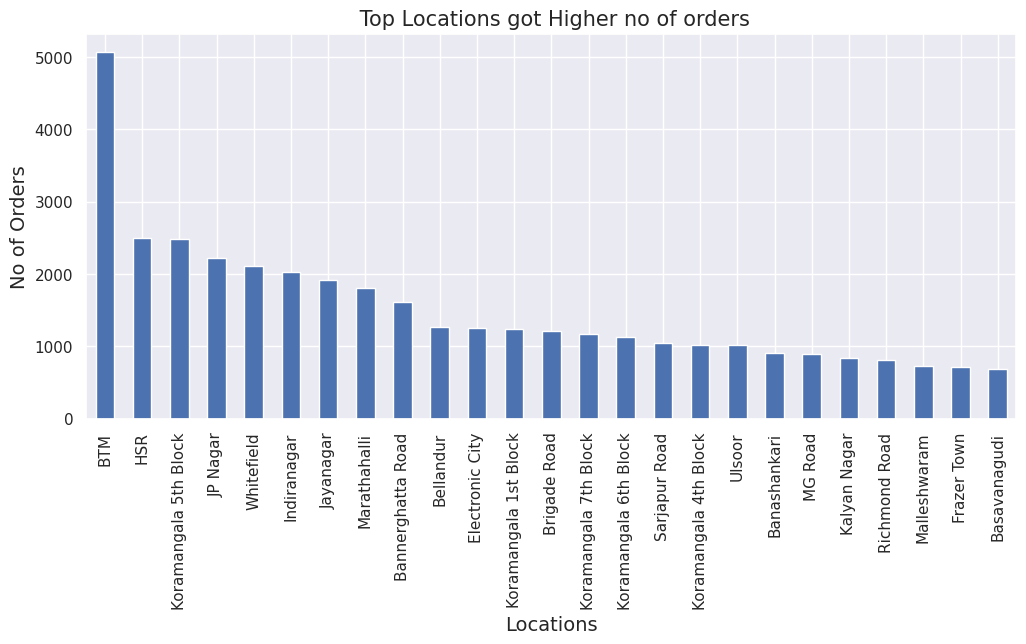

In [40]:
#checking Top Locations got Higher no of orders
plt.figure(figsize=(12,5))
df_2=data.location.value_counts()[0:25]
df_2.plot(kind='bar')
plt.xlabel('Locations',size=14)
plt.ylabel('No of Orders',size=14)
plt.title(' Top Locations got Higher no of orders',fontsize=15)
plt.show()



Above visualization shows that Location **BTM** got higher no of orders among all others locations.Also, **HSR and Koramangala 5th Block Location **also got good number of order which is approximately half of the orders of BTM location.

**Most Common Ratings for order**

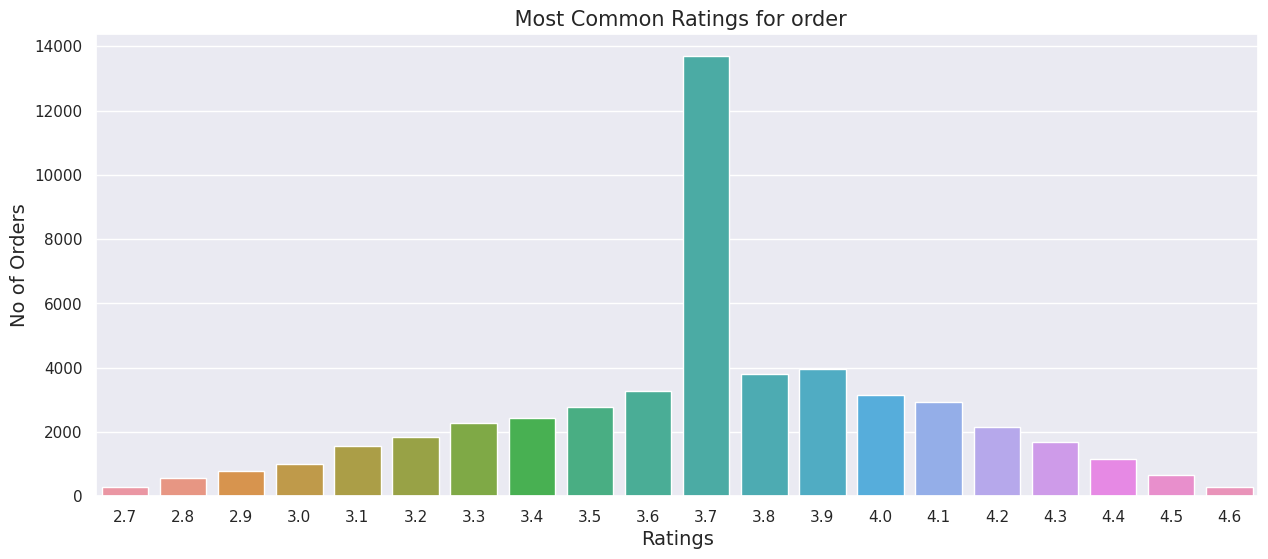

In [41]:
#checking the most common ratings for orders
df_3=data.rate.value_counts().reset_index()[0:20]
plt.figure(figsize=(15,6))
sns.barplot(x=df_3['index'],y=df_3['rate'])
plt.xlabel('Ratings',size=14)
plt.ylabel('No of Orders',size=14)
plt.title(' Most Common Ratings for order',fontsize=15)
plt.show()

we can see that maximum number of orders got **3.7 rating** for their restaurants.

**Common Approximate costs for meal of two people**

In [42]:
d=pd.DataFrame(data['approx_cost(for two people)'].value_counts().reset_index()[:20])
d.columns=['approx_cost(for two people)','count']
d=d.set_index('approx_cost(for two people)')

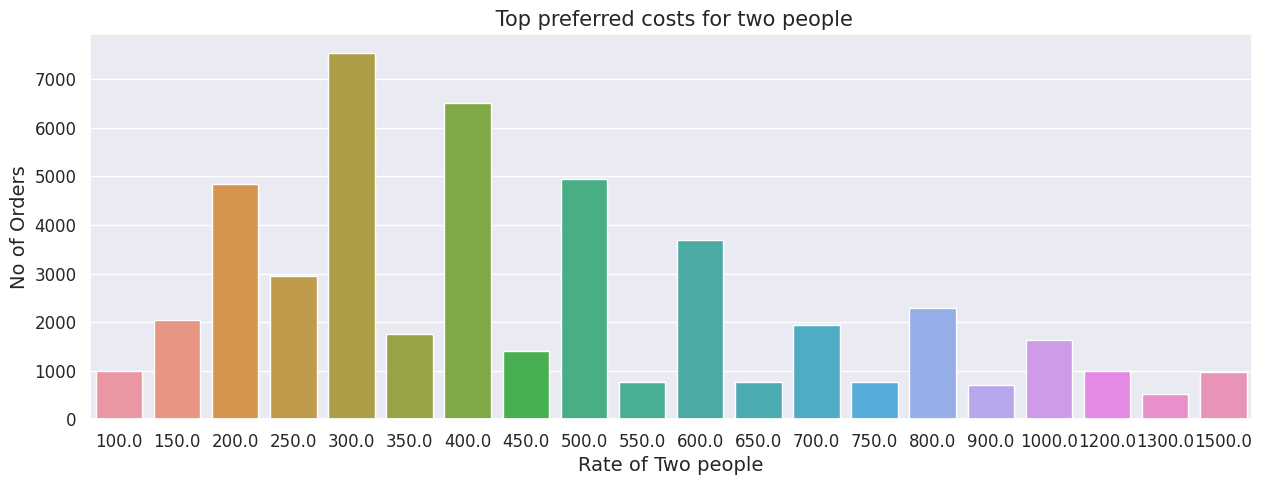

In [44]:
plt.figure(figsize=(15,5))
sns.barplot(x=d.index,y=d['count'])
plt.xlabel('Rate of Two people',size=14)
plt.ylabel('No of Orders',size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.title(' Top preferred costs for two people',fontsize=15)
plt.show()

**Restaurants Type vs No.of orders**

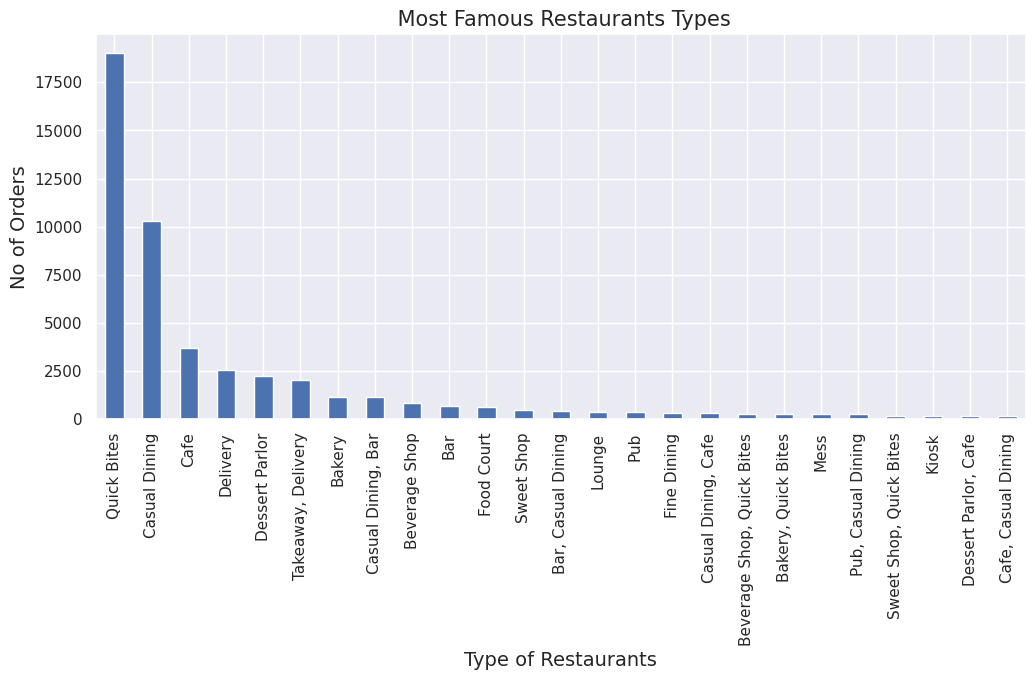

In [46]:
plt.figure(figsize=(12,5))
a=data.rest_type.value_counts()[0:25]
a.plot(kind='bar')
plt.xlabel('Type of Restaurants',size=14)
plt.ylabel('No of Orders',size=14)
plt.title(' Most Famous Restaurants Types',fontsize=15)
plt.show()

**Encoding Columns**

**Online Order Column**

In [47]:
data['online_order']=data['online_order'].replace({"Yes":1,"No":0})
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),area
0,Jalsa,1,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari
1,Spice Elephant,1,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari
2,San Churro Cafe,1,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari
3,Addhuri Udupi Bhojana,0,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari
4,Grand Village,0,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari


**Book Table Column**

In [48]:
data['book_table']=data['book_table'].replace({"Yes":1,"No":0})
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),area
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari


**Rest Type Column**

In [50]:
rest_df=pd.DataFrame(data['rest_type'])
rts=list(rest_df.rest_type.str.split(", "))
unique_rts=list(set([rt for sub_list in rts for rt in sub_list]))
for rt in unique_rts:
  rest_df[rt]=int(0)
rest_df.head()

,rest_type,Mess,Bar,Kiosk,Microbrewery,Delivery,Food Truck,Fine Dining,Dhaba,Pub,...,Casual Dining,Beverage Shop,Bhojanalya,Sweet Shop,Lounge,Pop Up,Meat Shop,Irani Cafee,Bakery,Food Court
0,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Cafe, Casual Dining",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Quick Bites,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
count=0
for i in rts:
  rest_df.loc[count,i]-int(1)
  count+=1

In [53]:
rest_df.head()

,rest_type,Mess,Bar,Kiosk,Microbrewery,Delivery,Food Truck,Fine Dining,Dhaba,Pub,...,Casual Dining,Beverage Shop,Bhojanalya,Sweet Shop,Lounge,Pop Up,Meat Shop,Irani Cafee,Bakery,Food Court
0,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Cafe, Casual Dining",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Quick Bites,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
rest_df.drop(['rest_type'],axis=1,inplace=True)
rest_df.head()

,Mess,Bar,Kiosk,Microbrewery,Delivery,Food Truck,Fine Dining,Dhaba,Pub,Cafe,...,Casual Dining,Beverage Shop,Bhojanalya,Sweet Shop,Lounge,Pop Up,Meat Shop,Irani Cafee,Bakery,Food Court
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Cuisines Column**


In [55]:
cuisines_df = pd.DataFrame(data['cuisines'])

cuisines = list(cuisines_df.cuisines.str.split(", "))

unique_cuisines = list(set([cs for sub_list in cuisines for cs in sub_list]))

unique_cuisines.remove("Cafe")

unique_cuisines.remove("Bakery")

for cs in unique_cuisines:
  cuisines_df[cs] = 0

cuisines_df.head()

,cuisines,Vegan,Malaysian,American,Sri Lankan,Indonesian,Thai,Sushi,Korean,European,...,Greek,Tibetan,Asian,Naga,Lebanese,Burmese,Jewish,Bihari,Japanese,Assamese
0,"North Indian, Mughlai, Chinese",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Chinese, North Indian, Thai",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Cafe, Mexican, Italian",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"South Indian, North Indian",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"North Indian, Rajasthani",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
correct_cuisines=[]
for i in cuisines:
  if "Cafe" in i:
    i.remove("Cafe")
  if "Bakery" in i:
    i.remove("Bakery")
  correct_cuisines.append(list(set(i)))

In [58]:
count=0
for i in correct_cuisines:
  cuisines_df.loc[count,i]=int(1)
  count+=1


In [59]:
cuisines_df.head()

,cuisines,Vegan,Malaysian,American,Sri Lankan,Indonesian,Thai,Sushi,Korean,European,...,Greek,Tibetan,Asian,Naga,Lebanese,Burmese,Jewish,Bihari,Japanese,Assamese
0,"North Indian, Mughlai, Chinese",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Chinese, North Indian, Thai",0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Cafe, Mexican, Italian",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"South Indian, North Indian",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"North Indian, Rajasthani",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
cuisines_df.drop(['cuisines'], axis = 1, inplace=True)
cuisines_df.head()

,Vegan,Malaysian,American,Sri Lankan,Indonesian,Thai,Sushi,Korean,European,Beverages,...,Greek,Tibetan,Asian,Naga,Lebanese,Burmese,Jewish,Bihari,Japanese,Assamese
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Location Column**

In [62]:
location_df = data['location']
location_df = pd.get_dummies(location_df)
location_df.head()

,BTM,Banashankari,Banaswadi,Bannerghatta Road,Basavanagudi,Basaveshwara Nagar,Bellandur,Bommanahalli,Brigade Road,Brookefield,...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Area Column**

In [64]:
area_df = data['area']
area_df = pd.get_dummies(area_df)
area_df.head()

,BTM,Banashankari,Bannerghatta Road,Basavanagudi,Bellandur,Brigade Road,Brookefield,Church Street,Electronic City,Frazer Town,...,Lavelle Road,MG Road,Malleshwaram,Marathahalli,New BEL Road,Old Airport Road,Rajajinagar,Residency Road,Sarjapur Road,Whitefield
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
data_with_location = pd.concat([data, rest_df, cuisines_df, location_df], axis = 1)
data_with_location.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),area,...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0


In [68]:
data_with_area = pd.concat([data, rest_df, cuisines_df, area_df], axis = 1)
data_with_area.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),area,...,Lavelle Road,MG Road,Malleshwaram,Marathahalli,New BEL Road,Old Airport Road,Rajajinagar,Residency Road,Sarjapur Road,Whitefield
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0


In [74]:
#data_with_location.drop(columns=['name', 'location', 'rest_type', 'cuisines', 'area'], axis = 1, inplace=True)
#data_with_area.drop(columns=['name', 'location', 'rest_type', 'cuisines', 'area'], axis=1, inplace=True)
print(data_with_location.columns[200:])

Index(['RT Nagar', 'Race Course Road', 'Rajajinagar', 'Rajarajeshwari Nagar',
       'Rammurthy Nagar', 'Residency Road', 'Richmond Road', 'Sadashiv Nagar',
       'Sahakara Nagar', 'Sanjay Nagar', 'Sankey Road', 'Sarjapur Road',
       'Seshadripuram', 'Shanti Nagar', 'Shivajinagar', 'South Bangalore',
       'St. Marks Road', 'Thippasandra', 'Ulsoor', 'Uttarahalli',
       'Varthur Main Road, Whitefield', 'Vasanth Nagar', 'Vijay Nagar',
       'West Bangalore', 'Whitefield', 'Wilson Garden', 'Yelahanka',
       'Yeshwantpur'],
      dtype='object')


**Feature Selection**

In [75]:
X1 = data_with_location.drop("rate", axis = 1).values
Y1 = data_with_location["rate"].values

print("X = ", X1)
print()
print("Y = ", Y1)

X =  [[  1.   1. 775. ...   0.   0.   0.]
 [  1.   0. 787. ...   0.   0.   0.]
 [  1.   0. 918. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   1. 236. ...   0.   0.   0.]
 [  0.   0.  13. ...   0.   0.   0.]]

Y =  [4.1 4.1 3.8 ... 3.7 4.3 3.4]


In [76]:
X2 = data_with_area.drop("rate", axis = 1).values
Y2 = data_with_area["rate"].values

print("X = ", X2)
print()
print("Y = ", Y2)

X =  [[  1.   1. 775. ...   0.   0.   0.]
 [  1.   0. 787. ...   0.   0.   0.]
 [  1.   0. 918. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   1.]
 [  0.   1. 236. ...   0.   0.   1.]
 [  0.   0.  13. ...   0.   0.   1.]]

Y =  [4.1 4.1 3.8 ... 3.7 4.3 3.4]


In [78]:
from sklearn.ensemble import ExtraTreesRegressor

In [79]:
# Extracting Important features from data_with_location Dataframe
imp_features1 = ExtraTreesRegressor()
imp_features1.fit(X1, Y1)
print(imp_features1.feature_importances_)

[1.89425343e-02 1.65229451e-01 3.07191740e-01 5.86210376e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.61707612e-05 1.03999833e-04 6.19521559e-03
 6.24845705e-06 8.59174557e-05 2.07854409e-03 1.30728229e-04
 2.14018545e-04 2.41672394e-03 8.06271350e-03 3.16004363e-03
 8.35837658e-09 3.95435365e-04 2.10140769e-05 7.64623070e-05
 6.90256856e-04 4.72090630e-05 1.99232243e-05 1.15652432e-06
 7.82529523e-03 6.11819160e-04 1.42828871e-02 1.32156531e-05
 1.42076342e-06 8.81404340e-06 3.08113626e-04 1.93034483e-04
 2.34893997e-03 1.38724045e-02 4.57367485e-03 4.38991691e-03
 2.77373091e-03 1.48267799e-06 2.96862814e-06 1.12460992e-04
 6.37203186e-03 1.101672

<Axes: >

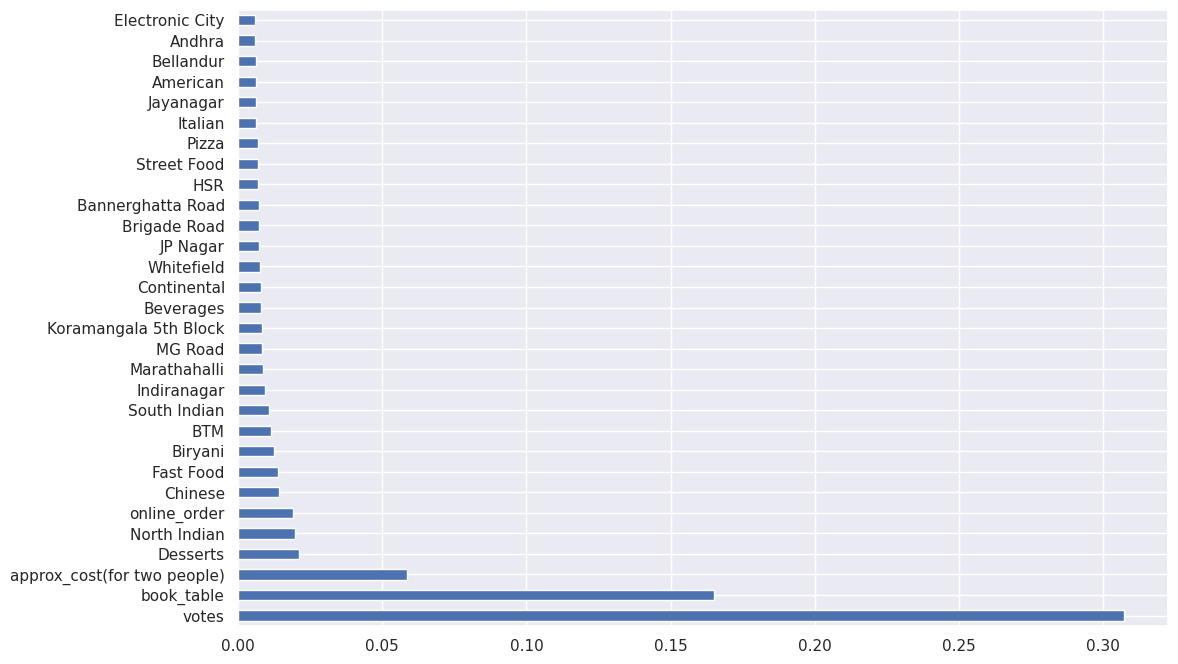

In [80]:
plt.figure(figsize = (12, 8))
columns = data_with_location.drop("rate", axis = 1).columns
fseries = pd.Series(imp_features1.feature_importances_, index = columns)
fseries.nlargest(30).plot(kind = "barh")

In [81]:
imp_features2 = ExtraTreesRegressor()
imp_features2.fit(X2, Y2)
print(imp_features2.feature_importances_)

[2.28247323e-02 1.65061985e-01 3.42089445e-01 8.78260251e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.90564227e-05 2.00712340e-04 7.71068419e-03
 6.76070348e-06 1.17016568e-04 2.59890661e-03 2.80078357e-04
 3.27314748e-04 2.99013051e-03 1.06966279e-02 4.07479163e-03
 8.35627847e-09 4.90085641e-04 3.40911463e-05 7.60184530e-05
 8.65743657e-04 4.80860800e-05 2.75196931e-05 3.68211951e-07
 1.10237808e-02 9.54962982e-04 1.55469495e-02 1.89837521e-05
 5.31593538e-06 8.18405227e-06 2.38144578e-04 2.24061599e-04
 3.20260251e-03 1.73431611e-02 5.81560853e-03 5.52522028e-03
 3.59763410e-03 2.68970319e-06 4.97974203e-06 1.29742081e-04
 1.16092602e-02 1.925836

<Axes: >

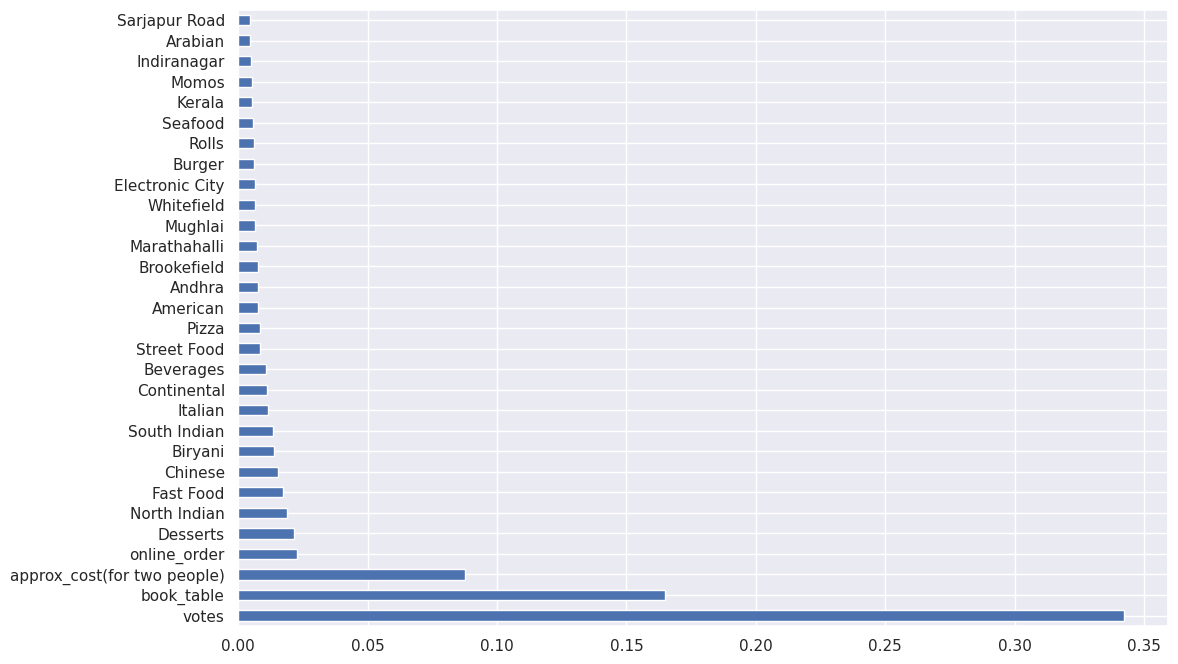

In [82]:
plt.figure(figsize = (12, 8))
columns = data_with_area.drop("rate", axis = 1).columns
fseries = pd.Series(imp_features2.feature_importances_, index = columns)
fseries.nlargest(30).plot(kind = "barh")

**Train Test Splitting of Data**

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

In [86]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=45)

**Importing ML Models**

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


**Linear Regression<br>
For data_with_location**

In [88]:
lr1 = LinearRegression()
lr1.fit(X1_train, Y1_train)

LinearRegression()

In [89]:
Y_lr1= lr1.predict(X1_test)
Y_lr1[:100]

array([3.59716071, 3.79820552, 3.59900575, 3.49192626, 3.56578041,
       3.86335835, 3.5787626 , 3.50998721, 3.87008115, 3.54650964,
       3.5395438 , 3.63374337, 3.56033872, 3.63895879, 4.20150754,
       3.37189697, 3.74940233, 4.32649796, 3.53774362, 3.4235566 ,
       3.43793492, 3.47210099, 3.83355093, 3.63091225, 3.51447324,
       3.53067166, 3.8107079 , 3.78914383, 3.6600234 , 3.50827932,
       3.70169858, 3.70769163, 3.88983848, 3.77501158, 3.49965241,
       3.45768236, 4.46901119, 3.5962954 , 3.44507252, 3.724239  ,
       3.61081368, 3.82115505, 3.55660385, 3.77917175, 3.60369835,
       3.60258859, 3.63135053, 3.49846193, 4.55564964, 4.23383911,
       3.52553855, 4.45032205, 3.63474974, 3.49929863, 3.61408783,
       3.74641774, 3.61459477, 3.54197376, 3.62963046, 3.54263396,
       3.73448545, 3.82567984, 3.4762837 , 3.71947809, 3.99368954,
       4.26394578, 3.47967836, 3.63078139, 3.77834703, 3.575521  ,
       3.67445633, 3.46896576, 3.61004626, 3.5342424 , 3.56128

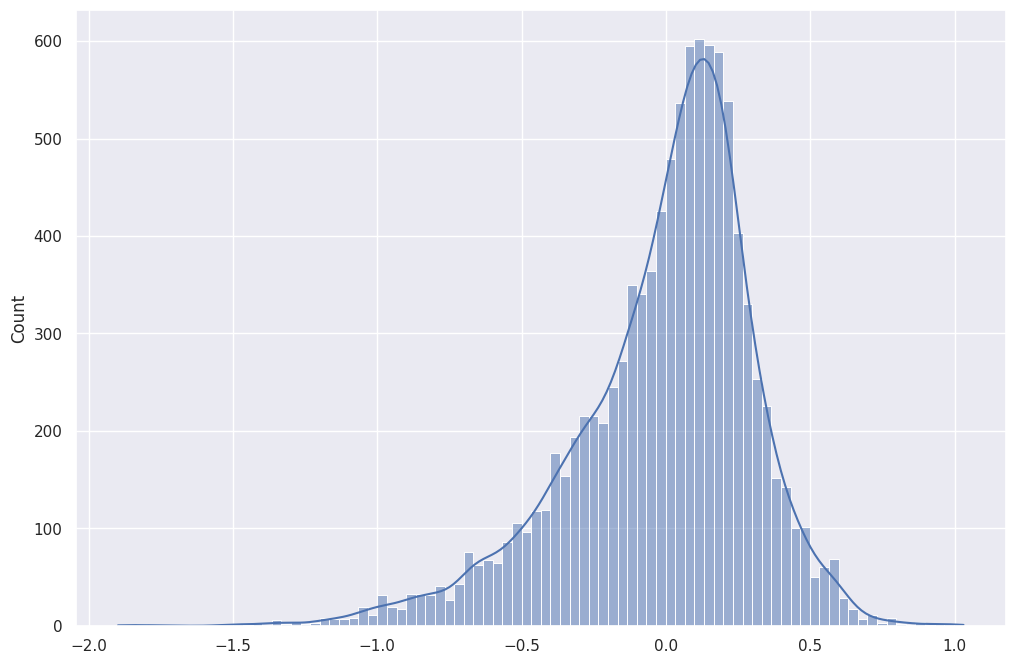

In [90]:
plt.figure(figsize=(12,8))
sns.histplot(Y1_test - Y_lr1, kde=True)
plt.show()

**For data_with_area**

In [91]:
lr2 = LinearRegression()
lr2.fit(X2_train, Y2_train)

LinearRegression()

In [92]:
Y_lr2 = lr2.predict(X2_test)
Y_lr2[:100]

array([3.50463102, 3.63148354, 3.86631268, 3.53188757, 3.64723246,
       3.49958121, 4.1219478 , 3.75191334, 3.74857549, 3.49281429,
       3.60926092, 3.72633795, 3.67017142, 4.07356211, 3.65657365,
       3.60395863, 3.98478838, 3.59059904, 4.14925168, 3.59354936,
       3.64551788, 3.81770702, 3.49593982, 3.69992599, 3.71174437,
       3.96086446, 4.1467664 , 3.47373084, 3.47191684, 3.6261869 ,
       3.72899802, 3.69566577, 3.80047609, 3.80622084, 3.57478811,
       3.49452755, 4.29827282, 3.50922379, 3.74241581, 3.7788835 ,
       3.65813048, 3.58902938, 4.02044343, 3.63395423, 3.56104795,
       3.76877644, 3.75797466, 3.50008325, 3.42810154, 3.5599308 ,
       3.49596861, 3.77123345, 3.84163153, 3.51725652, 3.95085849,
       3.84476756, 3.58968237, 3.68953761, 3.56281469, 3.56482872,
       3.64187426, 4.10112902, 3.6024602 , 3.48482323, 4.22914134,
       3.80682587, 3.9564629 , 3.64756544, 3.63637994, 3.76609805,
       3.74620096, 3.83562149, 3.54113333, 3.78526939, 3.50721

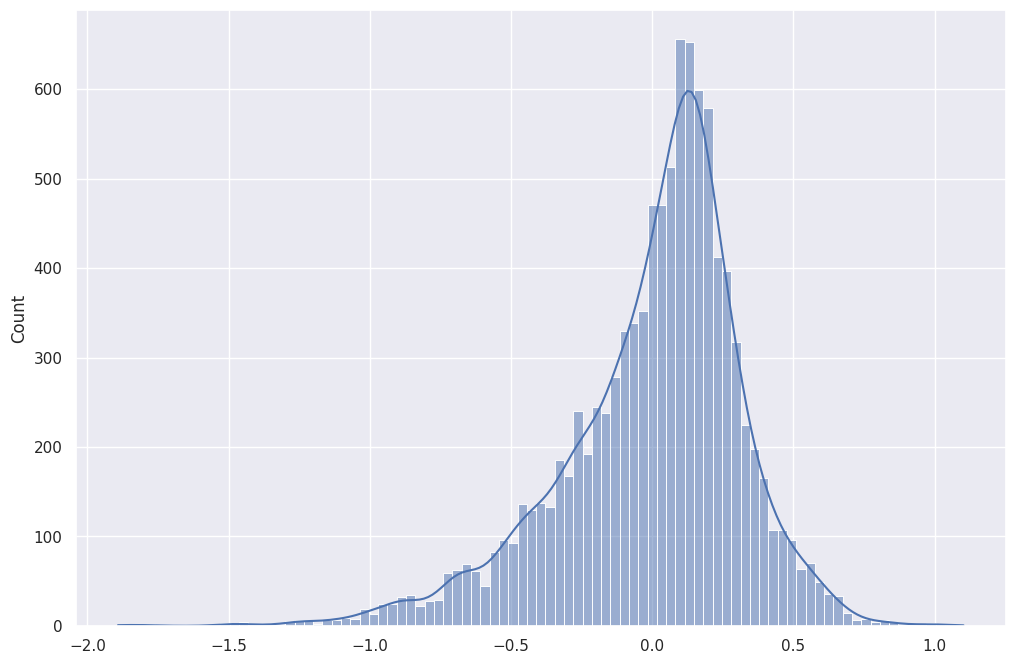

In [93]:
plt.figure(figsize=(12,8))
sns.histplot(Y2_test - Y_lr2, kde=True)
plt.show()

**Random Forest Regression<br>
For data_with_location**

In [94]:
rf1 = RandomForestRegressor()
rf1.fit(X1_train, Y1_train)

RandomForestRegressor()

In [95]:
Y_rf1 = rf1.predict(X1_test)
Y_rf1[:100]

array([3.214125  , 3.51025   , 3.7       , 3.27      , 3.26433333,
       4.1       , 3.5934    , 3.7       , 4.2       , 3.7       ,
       3.5       , 3.7       , 3.7       , 3.7       , 4.377     ,
       3.27543571, 3.9479381 , 4.2       , 3.7       , 3.1995    ,
       3.16311111, 3.7       , 3.7       , 3.74406667, 3.587     ,
       3.83499762, 3.7       , 4.3       , 3.5       , 3.378     ,
       3.503     , 3.33879762, 4.2       , 4.401     , 4.        ,
       3.1965    , 4.447     , 3.25      , 3.7       , 4.07766667,
       3.777     , 3.7       , 3.596     , 4.181     , 3.652     ,
       3.614     , 4.006     , 3.279     , 4.4       , 4.194     ,
       3.8       , 4.2       , 3.7       , 3.014     , 3.7       ,
       3.848     , 3.3       , 3.808     , 3.7       , 3.7       ,
       3.7       , 3.889     , 2.898     , 3.639     , 4.        ,
       4.10603333, 3.286     , 3.112     , 3.967     , 3.332     ,
       3.7       , 3.69      , 3.621     , 3.38941667, 3.547  

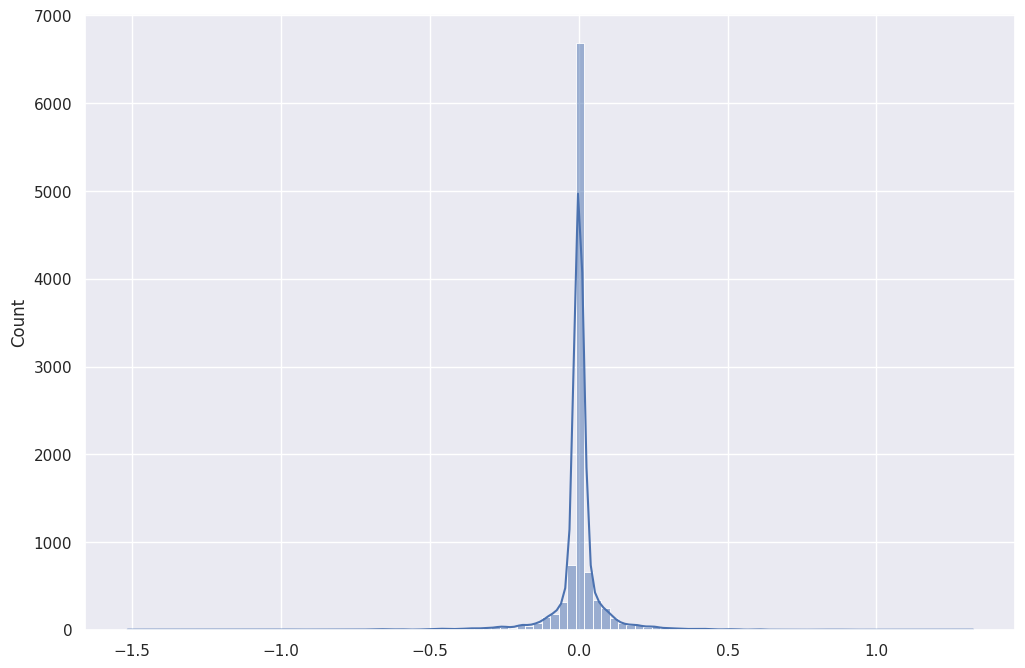

In [96]:
plt.figure(figsize=(12,8))
sns.histplot(Y1_test - Y_rf1, kde=True, bins=100)
plt.show()

**For data_with_area**

In [97]:
rf2 = RandomForestRegressor()
rf2.fit(X2_train, Y2_train)

RandomForestRegressor()

In [98]:
Y_rf2 = rf2.predict(X2_test)
Y_rf2[:100]

array([3.7       , 4.087     , 4.3       , 3.3       , 3.289     ,
       3.7       , 4.2       , 4.1943    , 3.262     , 3.82      ,
       3.484     , 3.7       , 3.7       , 4.183     , 3.687     ,
       3.3       , 4.402     , 3.735     , 4.292     , 3.7       ,
       4.183     , 4.0015    , 3.41      , 3.9       , 3.7       ,
       4.299     , 4.105     , 3.47775   , 3.7       , 3.7       ,
       3.592     , 3.886     , 4.068     , 3.897     , 3.7       ,
       3.226     , 4.502     , 3.171     , 3.012     , 3.498     ,
       2.846     , 3.993     , 4.544     , 3.7       , 3.7       ,
       4.165     , 3.931     , 2.877     , 3.647     , 3.528     ,
       3.19466667, 4.067     , 3.7       , 3.022     , 3.738     ,
       3.904     , 3.54      , 3.723     , 3.7       , 3.394     ,
       3.435     , 4.198     , 3.95966667, 3.7       , 4.398     ,
       4.        , 4.028     , 3.709     , 3.418     , 3.881     ,
       3.17236667, 4.1       , 3.7       , 3.69911111, 3.698  

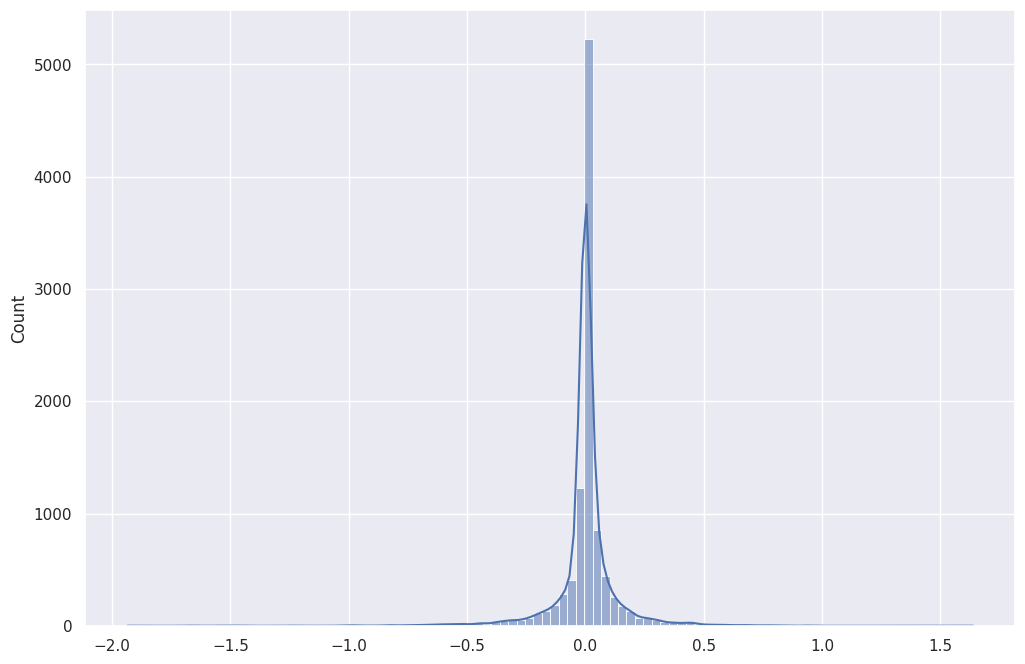

In [99]:
plt.figure(figsize=(12,8))
sns.histplot(Y2_test - Y_rf2, kde=True, bins=100)
plt.show()

**Model Evaluation**

In [100]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**Linear Regression Model<br>
for data_with_location**

In [101]:
mae =  mean_absolute_error(Y1_test, Y_lr1)
mse = mean_squared_error(Y1_test, Y_lr1)
r2score = r2_score(Y1_test, Y_lr1)

print("Coefficient of Determination for train data : ",lr1.score(X1_train, Y1_train))
print("Coefficient of Determination for test data : ",lr1.score(X1_test, Y1_test))
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse)
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score)

Coefficient of Determination for train data :  0.35093179212417325
Coefficient of Determination for test data :  0.350566243251645
Mean Absolute Error :  0.2414418133149019
Mean Squared Error :  0.10240985720802759
Root Mean Squared Error :  0.3200154015169076
R2 Score :  0.350566243251645


**for data_with_area**

In [102]:
mae =  mean_absolute_error(Y2_test, Y_lr2)
mse = mean_squared_error(Y2_test, Y_lr2)
r2score = r2_score(Y2_test, Y_lr2)

print("Coefficient of Determination for train data : ",lr2.score(X2_train, Y2_train))
print("Coefficient of Determination for test data : ",lr2.score(X2_test, Y2_test))
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse)
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score)

Coefficient of Determination for train data :  0.33666812066415475
Coefficient of Determination for test data :  0.33618521681137825
Mean Absolute Error :  0.24409663771774376
Mean Squared Error :  0.10403943136862913
Root Mean Squared Error :  0.3225514398799502
R2 Score :  0.33618521681137825


**Random Forest Regression Model<br>
for data_with_location**

In [103]:
mae =  mean_absolute_error(Y1_test, Y_rf1)
mse = mean_squared_error(Y1_test, Y_rf1)
r2score = r2_score(Y1_test, Y_rf1)

print("Coefficient of Determination for train data : ",rf1.score(X1_train, Y1_train))
print("Coefficient of Determination for test data : ",rf1.score(X1_test, Y1_test))
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse)
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score)

Coefficient of Determination for train data :  0.9896217830133646
Coefficient of Determination for test data :  0.9393005542265512
Mean Absolute Error :  0.03690494989250812
Mean Squared Error :  0.009571756179397347
Root Mean Squared Error :  0.09783535240084408
R2 Score :  0.9393005542265512


**for data_with_area**

In [104]:
mae =  mean_absolute_error(Y2_test, Y_rf2)
mse = mean_squared_error(Y2_test, Y_rf2)
r2score = r2_score(Y2_test, Y_rf2)

print("Coefficient of Determination for train data : ",rf2.score(X2_train, Y2_train))
print("Coefficient of Determination for test data : ",rf2.score(X2_test, Y2_test))
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse)
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score)

Coefficient of Determination for train data :  0.9824526308012642
Coefficient of Determination for test data :  0.8739892532718458
Mean Absolute Error :  0.06348931346082425
Mean Squared Error :  0.019749615055210817
Root Mean Squared Error :  0.14053332364678073
R2 Score :  0.8739892532718458


**Conclusion:**

*   Three models had been trained, namely Multiple Linear Regression, Random Forest Regression.
*   Based on the analysis, the best model for prediction is Random Forest Regression Model.


*   We will be using Random Forest Regression Model for data with location for our prediction system.
*   The Accuracy of the selected model is 91%.





In [105]:
#Saving the Model
import pickle

In [106]:
with open('rate_predict.pkl', 'wb') as file:
    pickle.dump(rf1, file)